In [1]:
# Import basic libraries... you might need to type 'pip install <library>' in the terminal to install them
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import the libraries for the machine learning model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder #encoding variables
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import CategoricalNB # creates the NB model
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score # to compute accuracy score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report # confusion matrix as a heatmap
from sklearn.model_selection import cross_val_score # for cross-validation
from sklearn.neighbors import KNeighborsClassifier # for KNN model
from sklearn.tree import DecisionTreeClassifier # classification tree model
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, roc_auc_score

In [3]:
# display all columns in the dataframe
pd.options.display.max_columns = None

In [4]:
### load the clean churn dataset

df = pd.read_csv('churn_cleaned.csv')

print(df.head)

<bound method NDFrame.head of        age gender security_no region_category  membership_category  \
0       18      F     XW0DQ7H         Village  Platinum Membership   
1       32      F     5K0N3X1            City   Premium Membership   
2       44      F     1F2TCL3            Town        No Membership   
3       37      M     VJGJ33N            City        No Membership   
4       31      F     SVZXCWB            City        No Membership   
...    ...    ...         ...             ...                  ...   
36987   46      F     6F51HFO            Town     Basic Membership   
36988   29      F     21KSM8Y            Town     Basic Membership   
36989   23      F     XK1IM9H            Town     Basic Membership   
36990   53      M     K6VTP1Z         Village  Platinum Membership   
36991   35      M     LBX0GLR            Town    Silver Membership   

      joining_date joined_through_referral referral_id  \
0       2017-08-17                      No    xxxxxxxx   
1       2017-

### More Data Cleaning

In [6]:
df.dtypes

age                               int64
gender                           object
security_no                      object
region_category                  object
membership_category              object
joining_date                     object
joined_through_referral          object
referral_id                      object
preferred_offer_types            object
medium_of_operation              object
internet_option                  object
last_visit_time                  object
days_since_last_login           float64
avg_time_spent                  float64
avg_transaction_value           float64
avg_frequency_login_days        float64
points_in_wallet                float64
used_special_discount            object
offer_application_preference     object
past_complaint                   object
complaint_status                 object
feedback                         object
churn_risk_score                  int64
had_complaint                     int64
engagement_score                float64


In [7]:
### further cleaning: drop the columns that are not needed for the model
df.drop('security_no', axis=1, inplace=True) # drop the security note column
df.drop('referral_id', axis=1, inplace=True) # drop the referral id column
df.drop('joining_date', axis=1, inplace=True) # drop the join date column
df.drop('last_visit_time', axis=1, inplace=True) # drop the last visit time column

In [8]:
df['membership_grouped'] = df['membership_grouped'].fillna('No Membership') # fill the missing values in the membership_grouped column with 'No Membership'

In [9]:
### download updated cleaned dataset (dropped columns)
df.to_csv('churn_cleaned_updated1.csv', index=False) # save the updated cleaned dataset

In [10]:
df_clean = pd.read_csv('churn_cleaned_updated1.csv')

print(df_clean.head)

<bound method NDFrame.head of        age gender region_category  membership_category  \
0       18      F         Village  Platinum Membership   
1       32      F            City   Premium Membership   
2       44      F            Town        No Membership   
3       37      M            City        No Membership   
4       31      F            City        No Membership   
...    ...    ...             ...                  ...   
36987   46      F            Town     Basic Membership   
36988   29      F            Town     Basic Membership   
36989   23      F            Town     Basic Membership   
36990   53      M         Village  Platinum Membership   
36991   35      M            Town    Silver Membership   

      joined_through_referral     preferred_offer_types medium_of_operation  \
0                          No     Gift Vouchers/Coupons             Desktop   
1                         Yes     Gift Vouchers/Coupons             Desktop   
2                         Yes     Gi

In [11]:
# check for missing values
print(df_clean.isnull().sum())

age                             0
gender                          0
region_category                 0
membership_category             0
joined_through_referral         0
preferred_offer_types           0
medium_of_operation             0
internet_option                 0
days_since_last_login           0
avg_time_spent                  0
avg_transaction_value           0
avg_frequency_login_days        0
points_in_wallet                0
used_special_discount           0
offer_application_preference    0
past_complaint                  0
complaint_status                0
feedback                        0
churn_risk_score                0
had_complaint                   0
engagement_score                0
membership_grouped              0
dtype: int64


In [13]:
df_clean.dtypes

age                               int64
gender                           object
region_category                  object
membership_category              object
joined_through_referral          object
preferred_offer_types            object
medium_of_operation              object
internet_option                  object
days_since_last_login           float64
avg_time_spent                  float64
avg_transaction_value           float64
avg_frequency_login_days        float64
points_in_wallet                float64
used_special_discount            object
offer_application_preference     object
past_complaint                   object
complaint_status                 object
feedback                         object
churn_risk_score                  int64
had_complaint                     int64
engagement_score                float64
membership_grouped               object
dtype: object

In [24]:
unique_values = df_clean['feedback'].unique()
print(unique_values)

['Products always in Stock' 'Quality Customer Care' 'Poor Website'
 'No reason specified' 'Poor Product Quality' 'Poor Customer Service'
 'Too many ads' 'User Friendly Website' 'Reasonable Price']


## Split Dataset into Train/Test Set


In [27]:
### Split the dataset into features and target variable
X = df_clean.drop(['churn_risk_score'], axis=1) # drop target variable
y = df_clean['churn_risk_score'] # target variable

### split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=456) # 80% training and 20% testing

# check the dimension of the train and test sets
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(29593, 21)
(7399, 21)
(29593,)
(7399,)


### Check training data set

In [30]:
# check X training data
X_train.head(5)

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,had_complaint,engagement_score,membership_grouped
18705,40,F,City,Premium Membership,Yes,Credit/Debit Card Offers,Smartphone,Mobile_Data,9.0,73.730000,24481.62,11.0,795.54,Yes,No,Yes,Solved,Poor Customer Service,1,1606.570000,Paid
4090,30,M,Town,Gold Membership,Yes,Credit/Debit Card Offers,Smartphone,Fiber_Optic,24.0,67.780000,25327.02,29.0,767.36,No,Yes,No,Not Applicable,Poor Customer Service,0,2732.980000,Paid
5483,55,M,City,Gold Membership,Yes,Without Offers,Desktop,Wi-Fi,19.0,671.200000,40148.94,10.0,615.13,Yes,No,Yes,Unsolved,No reason specified,1,7327.130000,Paid
3181,13,F,Town,Platinum Membership,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,22.0,116.400000,25344.91,5.0,728.26,No,Yes,Yes,Solved in Follow-up,No reason specified,1,1310.260000,Paid
1928,30,F,Town,Gold Membership,Yes,Gift Vouchers/Coupons,Both,Mobile_Data,9.0,1989.348334,18998.02,12.0,779.87,Yes,No,No,Not Applicable,Poor Product Quality,0,24652.050008,Paid


In [32]:
# check y training data
y_train.head(5)

18705    0
4090     0
5483     1
3181     0
1928     0
Name: churn_risk_score, dtype: int64

### Check test data set

In [35]:
# check x test data
X_test.head(5)

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,had_complaint,engagement_score,membership_grouped
7754,38,M,Town,No Membership,Yes,Gift Vouchers/Coupons,Smartphone,Fiber_Optic,8.0,135.09,36266.92,8.0,507.630000,No,Yes,No,Not Applicable,Poor Customer Service,0,1588.350000,No Membership
14087,16,F,Town,Basic Membership,Yes,Gift Vouchers/Coupons,Desktop,Fiber_Optic,23.0,32.78,15936.68,7.0,563.670000,No,Yes,Yes,Solved,Poor Website,1,793.130000,Basic
32638,32,F,City,No Membership,Yes,Gift Vouchers/Coupons,Desktop,Mobile_Data,15.0,116.68,871.64,16.0,651.780000,Yes,No,Yes,Solved in Follow-up,Poor Product Quality,1,2518.660000,No Membership
8028,29,M,City,No Membership,Yes,Gift Vouchers/Coupons,Smartphone,Wi-Fi,13.0,631.86,26931.73,15.0,604.740000,Yes,Yes,No,Not Applicable,Poor Customer Service,0,10082.640000,No Membership
18446,56,F,Town,Gold Membership,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,17.0,1445.35,15880.33,20.0,901.416552,Yes,No,Yes,Solved in Follow-up,Poor Website,1,29808.416552,Paid


In [37]:
# check y test data
y_test.head(5)

7754     1
14087    1
32638    1
8028     1
18446    0
Name: churn_risk_score, dtype: int64

### Check proportions to see if they're balanced

In [40]:
# proportion of churn risk in the training set
y_train.value_counts(normalize=True)

churn_risk_score
1    0.539891
0    0.460109
Name: proportion, dtype: float64

In [42]:
# proportion of churn risk in the test set
y_test.value_counts(normalize=True)

churn_risk_score
1    0.545344
0    0.454656
Name: proportion, dtype: float64

In [44]:
# proportion of churn risk in original dataset before train/test split
df_clean['churn_risk_score'].value_counts(normalize=True)

churn_risk_score
1    0.540982
0    0.459018
Name: proportion, dtype: float64

### Separate Column Types

In [47]:
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X_train.select_dtypes(include=['object']).columns.tolist()

num_cols, cat_cols

(['age',
  'days_since_last_login',
  'avg_time_spent',
  'avg_transaction_value',
  'avg_frequency_login_days',
  'points_in_wallet',
  'had_complaint',
  'engagement_score'],
 ['gender',
  'region_category',
  'membership_category',
  'joined_through_referral',
  'preferred_offer_types',
  'medium_of_operation',
  'internet_option',
  'used_special_discount',
  'offer_application_preference',
  'past_complaint',
  'complaint_status',
  'feedback',
  'membership_grouped'])

## Encoding categorical variables
- target variable (LabelEncoder() for all models)
- categorical predictor variables
    - OrdinalEncoder() (Naive Bayes and Classification Tree)
    - OneHotEncoder() (KNN)

### Encode Target Variable for all models

In [66]:
### initialize encoder for simpler coding
le = LabelEncoder()

### fit and transform on training data
y_train_enc = le.fit_transform(y_train)

### transform test target variable
y_test_enc = le.transform(y_test)

### Preprocess (encode) features/predictor variables for Classification Tree using `OrdinalEncoder`

In [54]:
### define preprocessors for categorical and numerical features (CLASSIFICATION TREE ONLY)
ordinal_preprocessor = ColumnTransformer([
    ('ordinal', OrdinalEncoder(), cat_cols),
    ('pass', 'passthrough', num_cols)
])

### Preprocess Features for KNN and NB (Multinomial) Using `OneHotEncoder`

In [57]:
### define preprocessors for categorical and numerical features
onehot_preprocessor = ColumnTransformer([
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False), cat_cols),
    ('pass', 'passthrough', num_cols)
])

TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'

### Plug each preprocessor into their model pipelines

In [64]:
# Naive Bayes pipeline
nb_pipeline = Pipeline([
    ('preprocess', onehot_preprocessor),
    ('model', MultinomialNB())
])

# KNN pipeline
knn_pipeline = Pipeline([
    ('preprocess', onehot_preprocessor),
    ('model', KNeighborsClassifier(n_neighbors=5))
])

# Decision Tree pipeline
tree_pipeline = Pipeline([
    ('preprocess', ordinal_preprocessor),
    ('model', DecisionTreeClassifier(random_state=42))
])

NameError: name 'onehot_preprocessor' is not defined

In [72]:
# Decision Tree pipeline
tree_pipeline = Pipeline([
    ('preprocess', ordinal_preprocessor),
    ('model', DecisionTreeClassifier(random_state=42))
    ])

## Methods

### Naive Bayes Classifier Model

In [ ]:
### fit the model
nb_pipeline.fit(X_train, y_train_enc)

### predict on the test set
nb_pipeline.fit(X_train, y_train_enc)

### predict and evaluate the model
nb_preds = nb_pipeline.predict(X_test)
print("Naive Bayes (Multinomial) Report:\n")
print(classification_report(y_test_enc, nb_preds))

### put it in a nice table


Naive Bayes (Multinomial) Report:

              precision    recall  f1-score   support

           0       0.49      0.62      0.55      3364
           1       0.60      0.47      0.52      4035

    accuracy                           0.54      7399
   macro avg       0.54      0.54      0.54      7399
weighted avg       0.55      0.54      0.53      7399



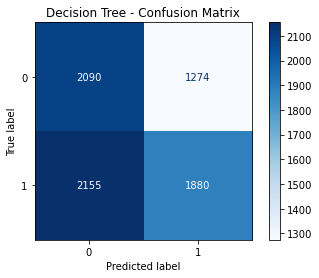

In [24]:
### confusion matrix
cm_nb = confusion_matrix(y_test_enc, nb_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=le.classes_)
disp.plot(cmap='Blues')
plt.title('Decision Tree - Confusion Matrix')
plt.show()

In [28]:
### cross validation
cv_nb = cross_val_score(nb_pipeline, X, le.transform(y), cv=5, scoring='accuracy')
print(f"Naive Bayes CV Accuracy: {cv_nb.mean():.4f}")


Naive Bayes CV Accuracy: 0.5330


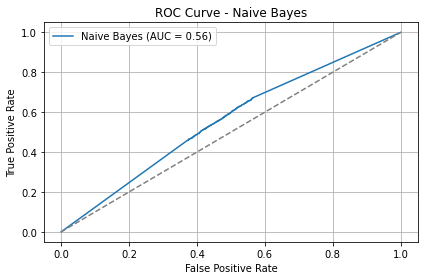

In [26]:
### AUC ROC curve
# get predicted probabilities for class 1 (churn = 1)
nb_probs = nb_pipeline.predict_proba(X_test)[:, 1]

# compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_enc, nb_probs)
auc_score = roc_auc_score(y_test_enc, nb_probs)

# plot ROC
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'Naive Bayes (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naive Bayes')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### KNN Model

### Classification Tree Model

In [86]:
# Fit the model
tree_pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred_tree = tree_pipeline.predict(X_test)

In [76]:
# Evaluate predictions
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tree))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))

Accuracy: 0.9133666711717799

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.91      0.91      3364
           1       0.92      0.92      0.92      4035

    accuracy                           0.91      7399
   macro avg       0.91      0.91      0.91      7399
weighted avg       0.91      0.91      0.91      7399


Confusion Matrix:
 [[3058  306]
 [ 335 3700]]


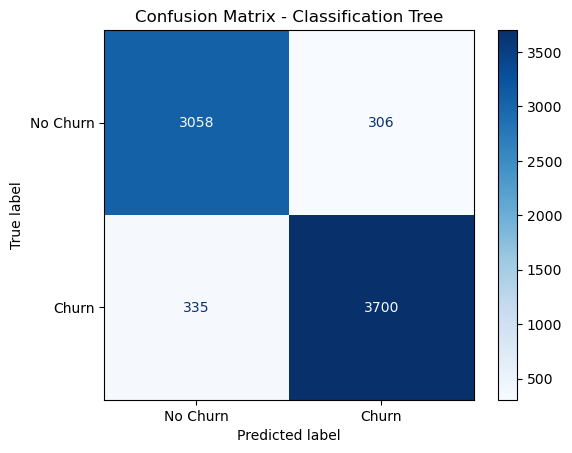

In [105]:
# Confusion matrix using pipeline
ConfusionMatrixDisplay.from_estimator(
    tree_pipeline,
    X_test,
    y_test,
    display_labels=["No Churn", "Churn"],
    cmap="Blues"
)
plt.title("Confusion Matrix - Classification Tree")
plt.show()


In [99]:
#cross-validation on training set using full pipeline
cv_scores = cross_val_score(tree_pipeline, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-Validation Accuracy Scores: [0.89998311 0.91079574 0.9102889  0.90824603 0.90638729]
Mean CV Accuracy: 0.9071402139997321


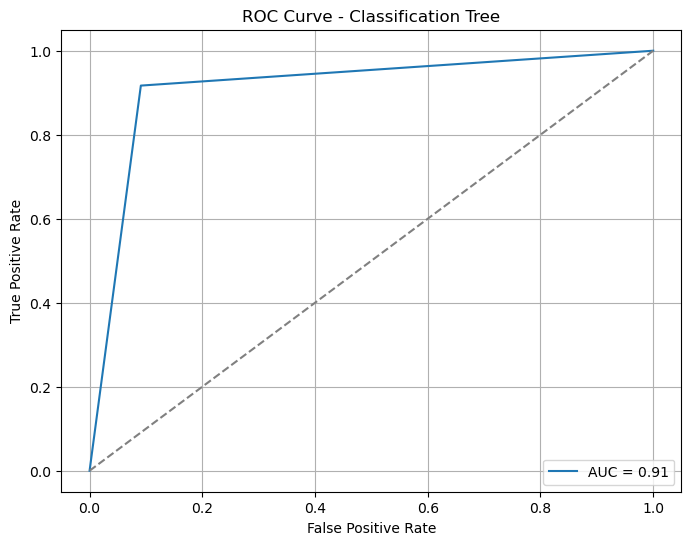

In [101]:
from sklearn.metrics import roc_curve, auc
# Predict probabilities for ROC curve (positive class)
y_proba = tree_pipeline.predict_proba(X_test)[:, 1]

# Generate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Classification Tree")
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [95]:
import pandas as pd

# Get feature importances from the trained model inside the pipeline
importances = tree_pipeline.named_steps['model'].feature_importances_

# Get feature names from the preprocessor
feature_names = tree_pipeline.named_steps['preprocess'].get_feature_names_out()

# Combine into a DataFrame for sorting and readability
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort by importance descending and show top 10
top_10_features = importance_df.sort_values(by='Importance', ascending=False).head(10)
print(top_10_features)

                           Feature  Importance
12     ordinal__membership_grouped    0.525995
18          pass__points_in_wallet    0.270457
2     ordinal__membership_category    0.038223
16     pass__avg_transaction_value    0.032919
15            pass__avg_time_spent    0.022519
20          pass__engagement_score    0.018202
13                       pass__age    0.017068
17  pass__avg_frequency_login_days    0.016799
14     pass__days_since_last_login    0.016738
11               ordinal__feedback    0.012644


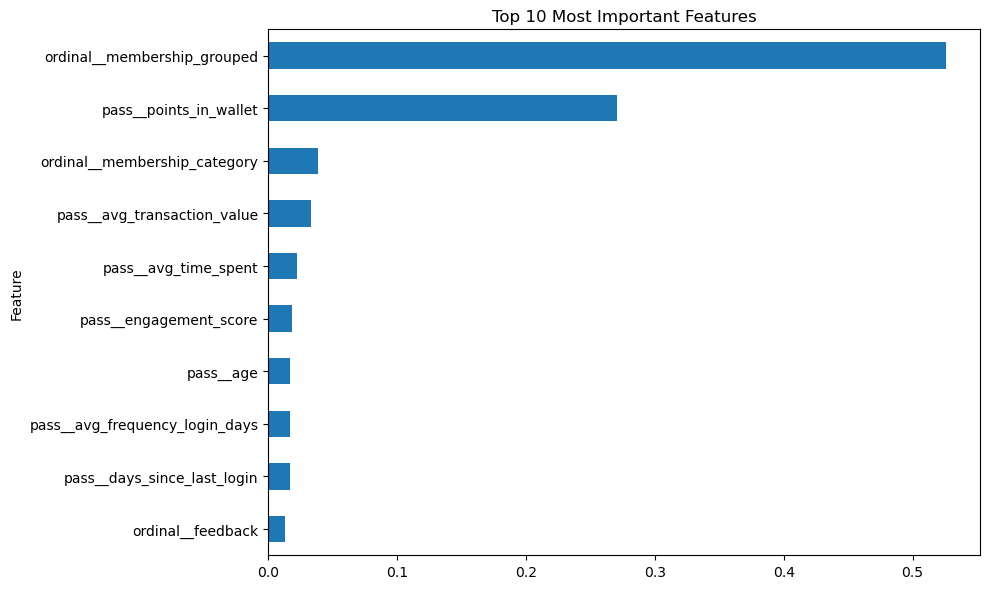

In [103]:
# Plot top 10 important features
top_10_features.plot(kind='barh', x='Feature', y='Importance', figsize=(10, 6), legend=False)
plt.title("Top 10 Most Important Features")
plt.gca().invert_yaxis()  # highest at top
plt.tight_layout()
plt.show()